In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
df = pd.read_csv('DataSets\heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [6]:
label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
x_df = df.drop('target',axis='columns')
x_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2


<Axes: >

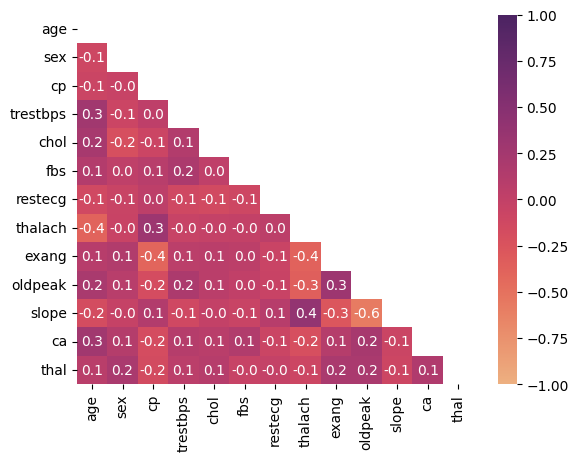

In [8]:
cor = x_df.corr()
maski = np.triu(np.ones_like(cor))
sb.heatmap(cor, annot=True,vmin=-1,vmax=1,mask=maski,fmt='.1f',cmap='flare')

In [9]:
y_df = df.target
y_df

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

In [10]:
names_features = x_df.columns
target_labels = y_df.unique()

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.2,random_state=57)
print("Training set:",len(x_train))
print("Testing set:",len(x_test))

Training set: 820
Testing set: 205


In [12]:
model = DecisionTreeClassifier(max_depth=9,random_state=67)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, random_state=67)

In [13]:
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
conf_mat=confusion_matrix(y_test,y_pred)
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy: 100.00%
Confusion Matrix:
 [[100   0]
 [  0 105]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       105

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



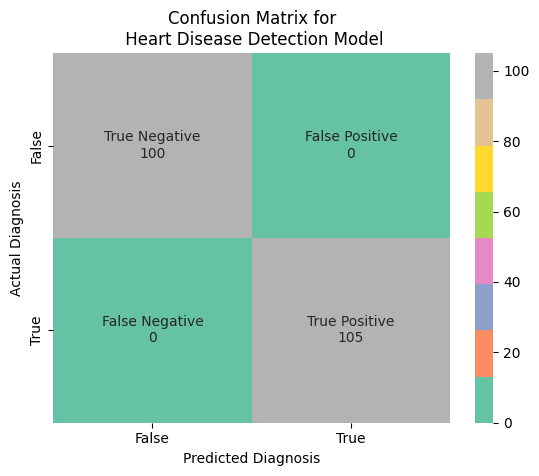

In [14]:
cf_mtrx=confusion_matrix(y_test,y_pred)
x_labels = ['False','True']
y_labels = ['False','True']
group_names = ['True Negative','False Positive','False Negative', 'True Positive']
group_counts = ["{:.0f}".format(value) for value in cf_mtrx.flatten()]
labels = [f"{v1}\n{v2}" for v1,v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sb.heatmap(cf_mtrx, annot=labels,fmt='',cmap='Set2',xticklabels=x_labels,yticklabels=y_labels)
plt.xlabel('Predicted Diagnosis')
plt.ylabel('Actual Diagnosis')
plt.title('Confusion Matrix for\n Heart Disease Detection Model')
plt.show()


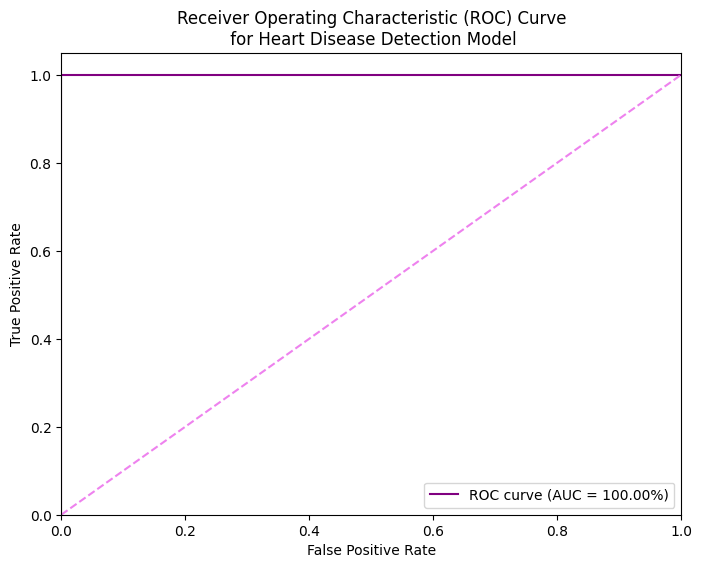

In [15]:

from sklearn.metrics import roc_curve, roc_auc_score
y_prob = model.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='purple',label='ROC curve (AUC = {:.2f}%)'.format(auc_score*100))
plt.plot([0, 1], [0, 1], color='violet',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\n for Heart Disease Detection Model')
plt.legend(loc='lower right')
plt.show()


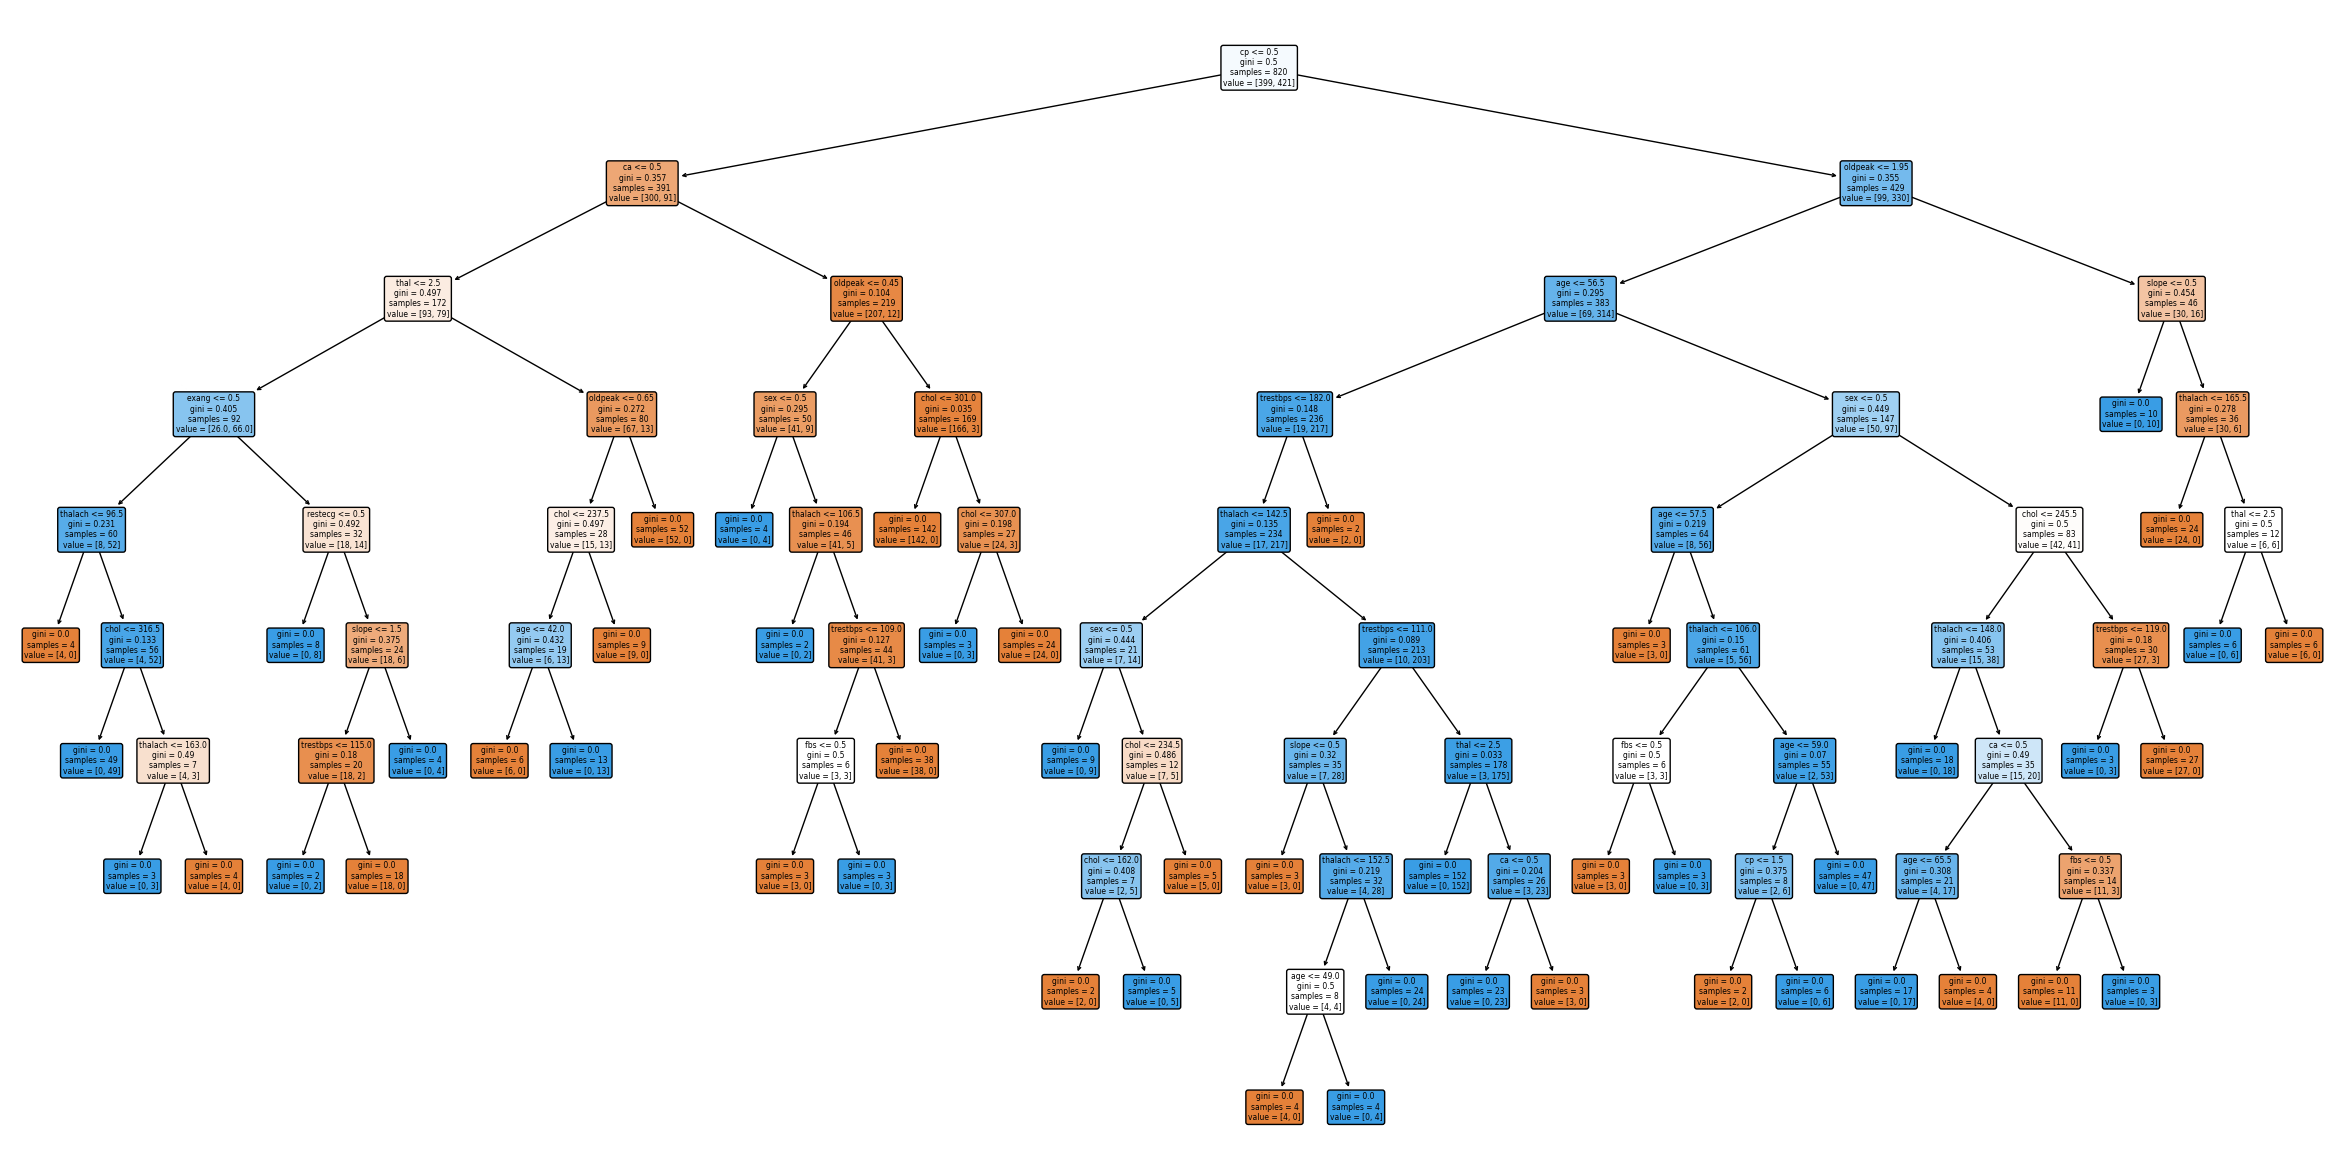

In [16]:
plt.figure(figsize=(30,15))
target_labels = y_df.astype(str)
plot_tree(model,feature_names=names_features,rounded=True,filled=True)
plt.show()

In [17]:
import joblib
joblib.dump(model,'sahil.pkl')

['sahil.pkl']